## **Data Visualization Data Clean**
## **Lab 2500 **


In [1]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 163.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 177.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 160.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 121.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 156.2 MB/s eta 0:00:00


In [19]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [20]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()

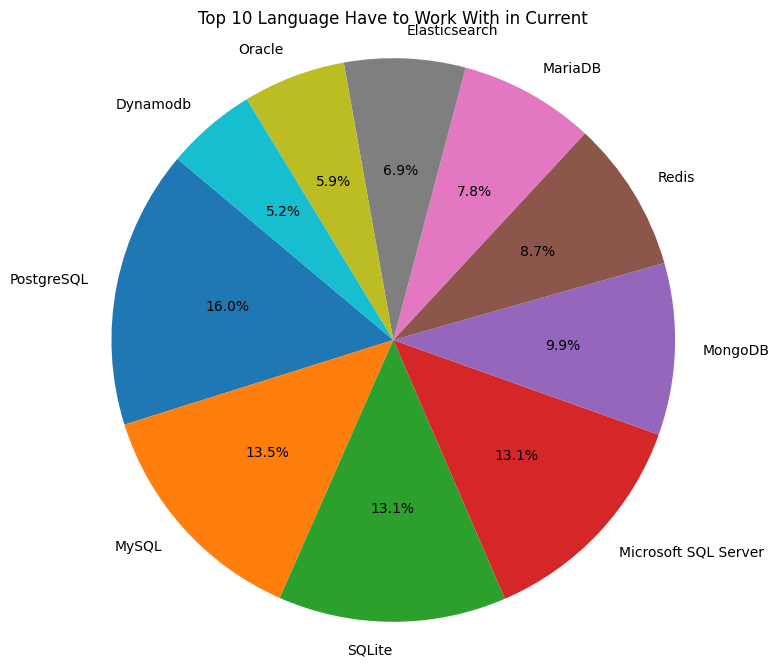

In [42]:
#
# LanguageHaveWorkedWith
#

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Create a pie chart of the top 5 databases(LanguageHaveWorkedWith) that respondents wish to learn next year.
QUERY = """
SELECT LanguageHaveWorkedWith
FROM main
"""
df = pd.read_sql_query(QUERY, conn)

# Split the comma-separated values and count occurrences
language_counts = pd.Series(
    [db.strip() for databases in df['LanguageHaveWorkedWith'].dropna()
     for db in databases.split(';')]
).value_counts().nlargest(10)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(language_counts, labels=database_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Language Have to Work With in Current')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Close the connection
conn.close()

In [70]:
df.head

<bound method NDFrame.head of                      WebframeWantToWorkWith
0                                      None
1          Express;Htmx;Node.js;React;Remix
2                              ASP.NET CORE
3              jQuery;Next.js;Node.js;React
4                                      None
...                                     ...
65432                                  None
65433                                  None
65434                                  None
65435                                  None
65436  Django;Express;Next.js;Node.js;React

[65437 rows x 1 columns]>

In [31]:
language_counts


JavaScript                 37492
HTML/CSS                   31816
Python                     30719
SQL                        30682
TypeScript                 23150
Bash/Shell (all shells)    20412
Java                       18239
C#                         16318
C++                        13827
C                          12184
Name: count, dtype: int64

In [32]:
# Save the modified dataset to a CSV file
output_file_path = 'LanguageHaveWorkedWith_survey_data.csv'  # Choose your desired file path and name
df.to_csv(output_file_path, index=False)  # index=False to avoid saving row indices

print(f"Cleaned and analyzed dataset saved to: {output_file_path}")

Cleaned and analyzed dataset saved to: LanguageHaveWorkedWith_survey_data.csv


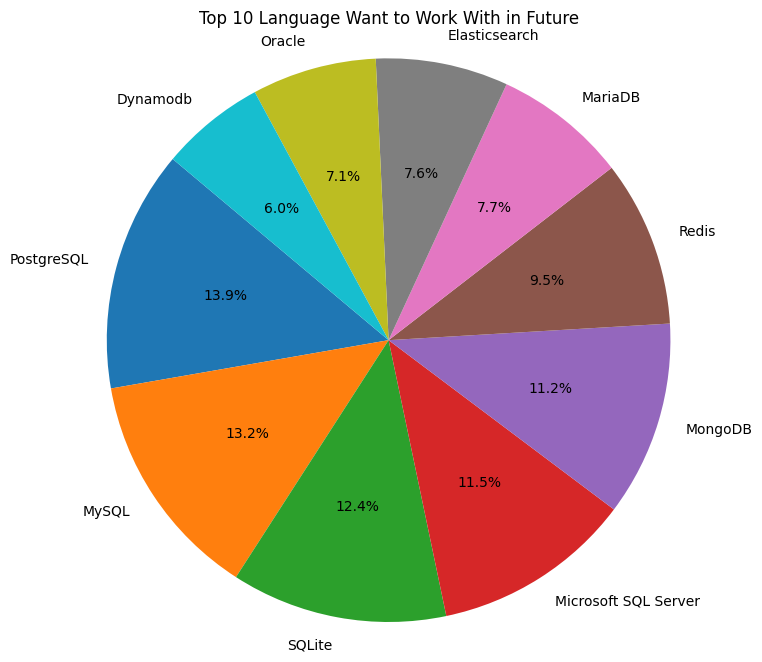

In [43]:
#
# LanguageWantToWorkWith
#
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Create a pie chart of the top 5 databases(LanguageWantToWorkWith) that respondents wish to learn next year.
QUERY = """
SELECT LanguageWantToWorkWith
FROM main
"""
df = pd.read_sql_query(QUERY, conn)

# Split the comma-separated values and count occurrences
language_counts = pd.Series(
    [db.strip() for databases in df['LanguageWantToWorkWith'].dropna()
     for db in databases.split(';')]
).value_counts().nlargest(10)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(language_counts, labels=database_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Language Want to Work With in Future')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Close the connection
conn.close()

In [35]:
language_counts

Python                     25047
JavaScript                 23774
SQL                        22400
HTML/CSS                   20721
TypeScript                 20239
Rust                       17232
Go                         13837
Bash/Shell (all shells)    13744
C#                         12921
C++                        10873
Name: count, dtype: int64

In [36]:
# Save the modified dataset to a CSV file
output_file_path = 'LanguageWantToWorkWith_survey_data.csv'  # Choose your desired file path and name
df.to_csv(output_file_path, index=False)  # index=False to avoid saving row indices

print(f"Cleaned and analyzed dataset saved to: {output_file_path}")

Cleaned and analyzed dataset saved to: LanguageWantToWorkWith_survey_data.csv


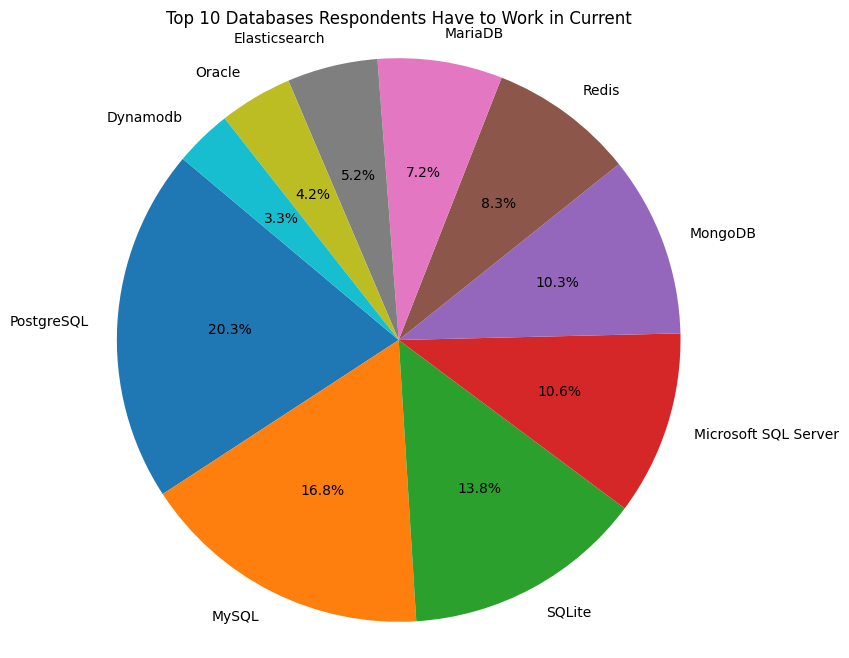

In [44]:
# 
# DatabaseHaveWorkedWith
#

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Create a pie chart of the top 5 databases(DatabaseWantToWorkWith) that respondents wish to learn next year.
QUERY = """
SELECT DatabaseHaveWorkedWith
FROM main
"""
df = pd.read_sql_query(QUERY, conn)

# Split the comma-separated values and count occurrences
database_counts = pd.Series(
    [db.strip() for databases in df['DatabaseHaveWorkedWith'].dropna()
     for db in databases.split(';')]
).value_counts().nlargest(10)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(database_counts, labels=database_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Databases Respondents Have to Work in Current')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Close the connection
conn.close()

In [40]:
database_counts

PostgreSQL              25536
MySQL                   21099
SQLite                  17365
Microsoft SQL Server    13275
MongoDB                 13007
Redis                   10463
MariaDB                  8991
Elasticsearch            6533
Oracle                   5273
Dynamodb                 4138
Name: count, dtype: int64

In [41]:
# Save the modified dataset to a CSV file
output_file_path = 'DatabaseHaveToWorkWith_survey_data.csv'  # Choose your desired file path and name
df.to_csv(output_file_path, index=False)  # index=False to avoid saving row indices

print(f"Cleaned and analyzed dataset saved to: {output_file_path}")

Cleaned and analyzed dataset saved to: DatabaseHaveToWorkWith_survey_data.csv


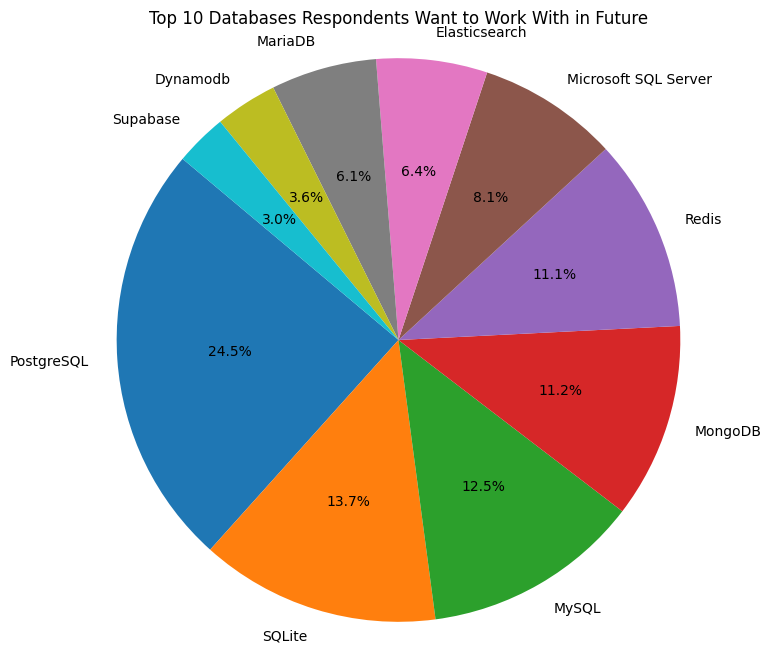

In [45]:
# 
# DatabaseWantToWorkWith
#

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Create a pie chart of the top 5 databases(DatabaseWantToWorkWith) that respondents wish to learn next year.
QUERY = """
SELECT DatabaseWantToWorkWith
FROM main
"""
df = pd.read_sql_query(QUERY, conn)

# Split the comma-separated values and count occurrences
database_counts = pd.Series(
    [db.strip() for databases in df['DatabaseWantToWorkWith'].dropna()
     for db in databases.split(';')]
).value_counts().nlargest(10)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(database_counts, labels=database_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Databases Respondents Want to Work With in Future')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Close the connection
conn.close()

In [46]:
database_counts

PostgreSQL              24005
SQLite                  13489
MySQL                   12269
MongoDB                 10982
Redis                   10847
Microsoft SQL Server     7905
Elasticsearch            6246
MariaDB                  5947
Dynamodb                 3503
Supabase                 2930
Name: count, dtype: int64

In [47]:
# Save the modified dataset to a CSV file
output_file_path = 'DatabaseWantToWorkWith_survey_data.csv'  # Choose your desired file path and name
df.to_csv(output_file_path, index=False)  # index=False to avoid saving row indices

print(f"Cleaned and analyzed dataset saved to: {output_file_path}")

Cleaned and analyzed dataset saved to: DatabaseWantToWorkWith_survey_data.csv


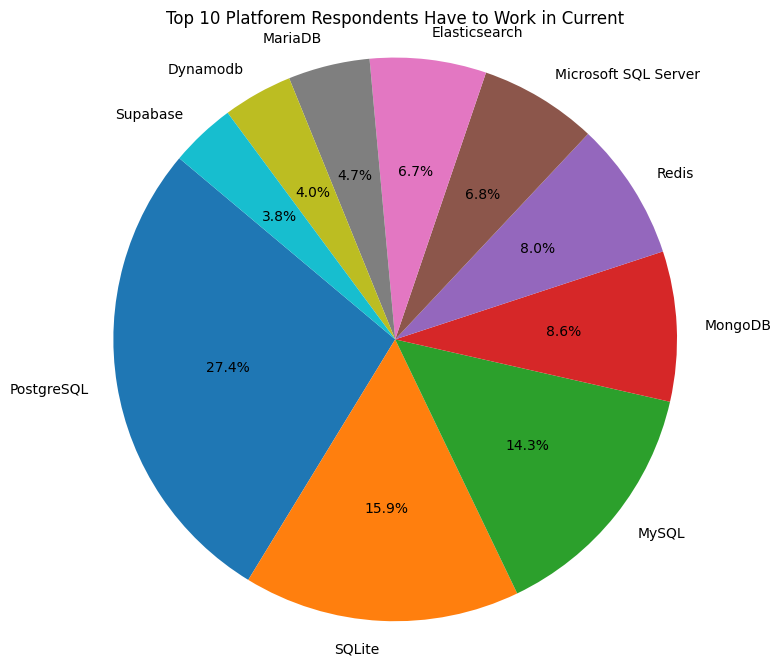

In [48]:
# 
# PlatformHaveWorkedWith
#

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Create a pie chart of the top 5 databases(PlatformHaveWorkedWith) that respondents wish to learn next year.
QUERY = """
SELECT PlatformHaveWorkedWith
FROM main
"""
df = pd.read_sql_query(QUERY, conn)

# Split the comma-separated values and count occurrences
platform_counts = pd.Series(
    [db.strip() for databases in df['PlatformHaveWorkedWith'].dropna()
     for db in databases.split(';')]
).value_counts().nlargest(10)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(platform_counts, labels=database_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Platforem Respondents Have to Work in Current')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Close the connection
conn.close()

In [50]:
platform_counts

Amazon Web Services (AWS)    22191
Microsoft Azure              12850
Google Cloud                 11605
Cloudflare                    6974
Firebase                      6443
Vercel                        5491
Digital Ocean                 5409
Heroku                        3798
Netlify                       3238
VMware                        3043
Name: count, dtype: int64

In [51]:
# Save the modified dataset to a CSV file
output_file_path = 'PlatformHaveToWorkWith_survey_data.csv'  # Choose your desired file path and name
df.to_csv(output_file_path, index=False)  # index=False to avoid saving row indices

print(f"Cleaned and analyzed dataset saved to: {output_file_path}")

Cleaned and analyzed dataset saved to: PlatformHaveToWorkWith_survey_data.csv


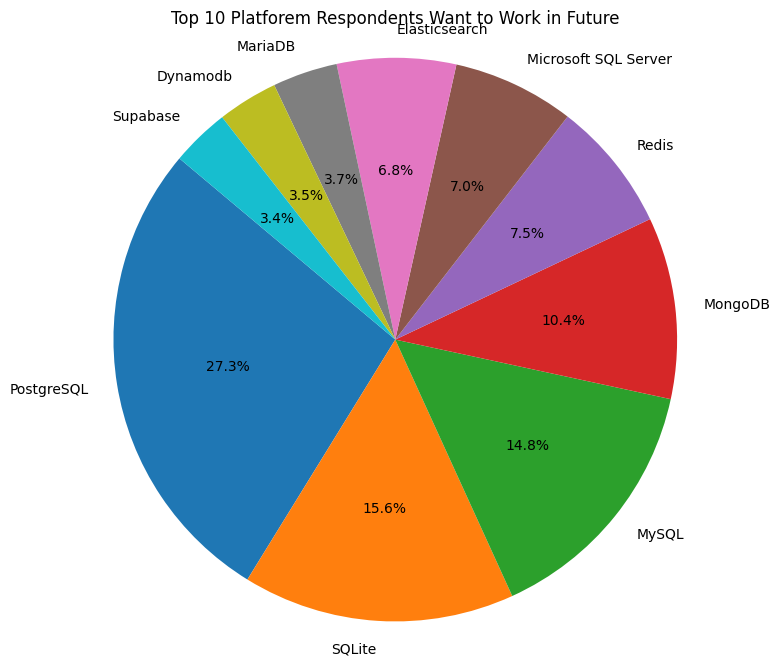

In [52]:
#
# PlatformWantToWorkWith
#

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Create a pie chart of the top 5 databases(PlatformWantToWorkWith) that respondents wish to learn next year.
QUERY = """
SELECT PlatformWantToWorkWith
FROM main
"""
df = pd.read_sql_query(QUERY, conn)

# Split the comma-separated values and count occurrences
platform_counts = pd.Series(
    [db.strip() for databases in df['PlatformWantToWorkWith'].dropna()
     for db in databases.split(';')]
).value_counts().nlargest(10)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(platform_counts, labels=database_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Platforem Respondents Want to Work in Future')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Close the connection
conn.close()

In [53]:
platform_counts

Amazon Web Services (AWS)    18040
Microsoft Azure              10304
Google Cloud                  9772
Cloudflare                    6881
Firebase                      4952
Vercel                        4614
Digital Ocean                 4507
Hetzner                       2460
Supabase                      2287
Netlify                       2217
Name: count, dtype: int64

In [54]:
# Save the modified dataset to a CSV file
output_file_path = 'PlatformWantToWorkWith_survey_data.csv'  # Choose your desired file path and name
df.to_csv(output_file_path, index=False)  # index=False to avoid saving row indices

print(f"Cleaned and analyzed dataset saved to: {output_file_path}")

Cleaned and analyzed dataset saved to: PlatformWantToWorkWith_survey_data.csv


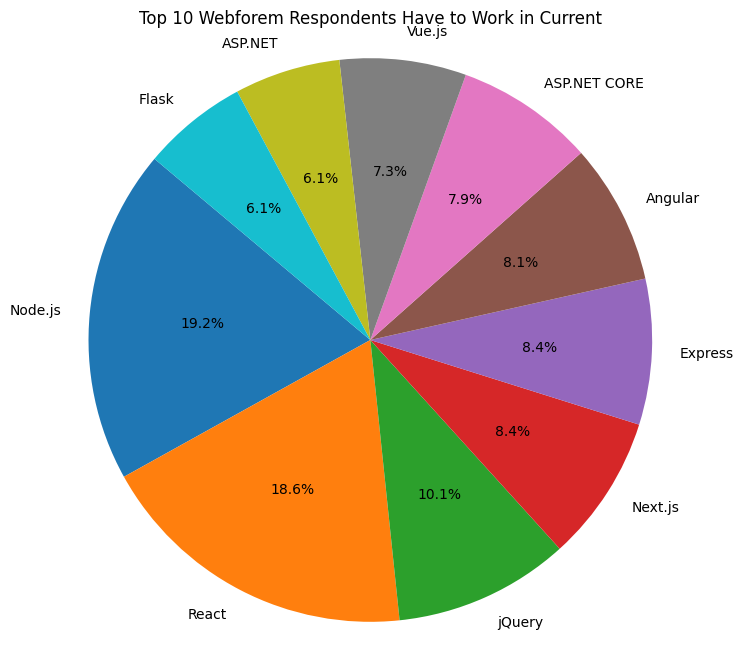

In [64]:
# 
# WebframeHaveWorkedWith
#

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Create a pie chart of the top 5 databases(WebframeHaveWorkedWith) that respondents wish to learn next year.
QUERY = """
SELECT WebframeHaveWorkedWith
FROM main
"""
df = pd.read_sql_query(QUERY, conn)

# Split the comma-separated values and count occurrences
webform_counts = pd.Series(
    [db.strip() for databases in df['WebframeHaveWorkedWith'].dropna()
     for db in databases.split(';')]
).value_counts().nlargest(10)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(webform_counts, labels=webform_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Webforem Respondents Have to Work in Current')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Close the connection
conn.close()

In [65]:
webform_counts

Node.js         19772
React           19167
jQuery          10381
Next.js          8681
Express          8614
Angular          8306
ASP.NET CORE     8187
Vue.js           7483
ASP.NET          6265
Flask            6245
Name: count, dtype: int64

In [66]:
# Save the modified dataset to a CSV file
output_file_path = 'WebformHaveToWorkWith_survey_data.csv'  # Choose your desired file path and name
df.to_csv(output_file_path, index=False)  # index=False to avoid saving row indices

print(f"Cleaned and analyzed dataset saved to: {output_file_path}")

Cleaned and analyzed dataset saved to: WebformHaveToWorkWith_survey_data.csv


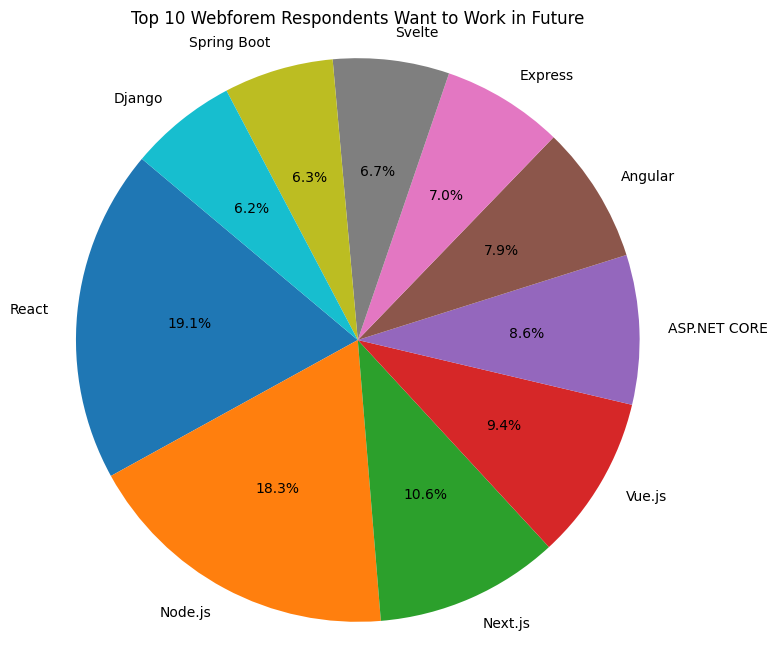

In [67]:
#
# WebframeWantToWorkWith
#

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Create a pie chart of the top 5 databases(WebframeWantToWorkWith) that respondents wish to learn next year.
QUERY = """
SELECT WebframeWantToWorkWith
FROM main
"""
df = pd.read_sql_query(QUERY, conn)

# Split the comma-separated values and count occurrences
webform_counts = pd.Series(
    [db.strip() for databases in df['WebframeWantToWorkWith'].dropna()
     for db in databases.split(';')]
).value_counts().nlargest(10)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(webform_counts, labels=webform_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Webforem Respondents Want to Work in Future')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Close the connection
conn.close()

In [68]:
webform_counts

React           15404
Node.js         14735
Next.js          8507
Vue.js           7604
ASP.NET CORE     6905
Angular          6364
Express          5616
Svelte           5374
Spring Boot      5068
Django           4973
Name: count, dtype: int64

In [69]:
# Save the modified dataset to a CSV file
output_file_path = 'WebformWantToWorkWith_survey_data.csv'  # Choose your desired file path and name
df.to_csv(output_file_path, index=False)  # index=False to avoid saving row indices

print(f"Cleaned and analyzed dataset saved to: {output_file_path}")

Cleaned and analyzed dataset saved to: WebformWantToWorkWith_survey_data.csv


In [17]:
df.head()

,DatabaseWantToWorkWith
0,None
1,PostgreSQL
2,Firebase Realtime Database
3,MongoDB;MySQL;PostgreSQL
4,PostgreSQL;SQLite


In [18]:
database_counts

PostgreSQL    24005
SQLite        13489
MySQL         12269
MongoDB       10982
Redis         10847
Name: count, dtype: int64

In [ ]:
# Save the modified dataset to a CSV file
###### output_file_path = 'cleaned_survey_data.csv'  # Choose your desired file path and name
df.to_csv(output_file_path, index=False)  # index=False to avoid saving row indices

print(f"Cleaned and analyzed dataset saved to: {output_file_path}")